## Multi Layer Perceptron
#### 3 hidden layers
#### Sigmoid activation

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
#Hyper Parameters
input_size = 1 
output_size = 1 
hidden_size = 10 
num_epochs = 1000
learning_rate = 0.001

n = 100


#Dataset

#unidimensional tensor of 100 elements
x_train = torch.linspace(0,4*3.1416,100)
y_train = x_train.data.numpy
y_train = 10*np.sin(x_train)


#reshaping to bidimensional tensors
x_train = torch.reshape(x_train, (100, 1))
y_train = torch.reshape(y_train, (100, 1))


#MLP class
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        #nn.Module.__init__(self)
        super(MLP, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.hidden_1 = nn.Linear(input_size, hidden_size)
        self.hidden_2 = nn.Linear(hidden_size, hidden_size)
        self.hidden_3 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size) 
        
    #defines the computation performed at every call
    def forward(self, x):
        out = self.sigmoid(self.hidden_1(x))
        out = self.sigmoid(self.hidden_2(out))
        out = self.sigmoid(self.hidden_3(out))
        out = self.output(out) 
        return out


In [3]:
model = MLP(input_size, output_size)

#Loss and Optimizer
#creates a criterion that measures the mean squared error 
#between n elements in the input x and target y
criterion = nn.MSELoss()
#optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [4]:
#Train
for epoch in range(num_epochs):
    inputs = x_train
    targets = y_train
    
    #Forward + Backward + Optimize
    
    #clears the gradients of all optimized torch.Tensors 
    optimizer.zero_grad()
    #applies linear transformation (a call to model.forward(inputs) )
    output = model(inputs)
    #calculates RMS error between targets and output
    loss = criterion(output, targets)
    #accumulates the gradient for each parameter
    loss.backward()
    #updates parameters based on current gradients
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data[0])) 


C:\Users\Juanig\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [100/1000], Loss: 49.5083
Epoch [200/1000], Loss: 49.5021
Epoch [300/1000], Loss: 49.4999
Epoch [400/1000], Loss: 49.4988
Epoch [500/1000], Loss: 49.4980
Epoch [600/1000], Loss: 49.4973
Epoch [700/1000], Loss: 49.4966
Epoch [800/1000], Loss: 49.4959
Epoch [900/1000], Loss: 49.4952
Epoch [1000/1000], Loss: 49.4945


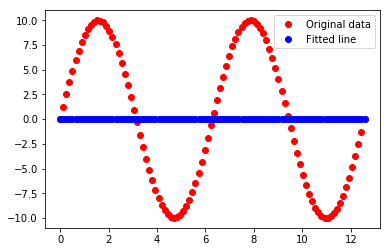

In [5]:
#Plot
predicted = model(x_train).data
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted.numpy(), 'bo', label='Fitted line')
plt.legend()
plt.show()